In [45]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
from operator import itemgetter


#handling information
import re
import json

#handling plots
import matplotlib.pyplot as plt
import seaborn as sns

#for network creation
import networkx as nx

In [46]:
pd.set_option('display.float_format', lambda x: '%.f' % x)

In [47]:
# Read json into a pandas dataframe
tweets_df = pd.read_json("twitter_politics.txt", lines=True)

In [167]:
#retweet data as csv
#tweets_df.to_csv("data/retweet/data1.csv")

In [49]:
# Create a second dataframe to put important information
tweets_final = pd.DataFrame(columns = ["created_at", "id", "in_reply_to_screen_name", "in_reply_to_status_id", "in_reply_to_user_id",
                                      "retweeted_id", "retweeted_screen_name", "user_mentions_screen_name", "user_mentions_id", 
                                       "text", "user_id", "screen_name", "followers_count"])

In [50]:
# Columns that are going to be the same
equal_columns = ["created_at", "id", "text"]
tweets_final[equal_columns] = tweets_df[equal_columns]
tweets_final.head(5)

,created_at,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,retweeted_id,retweeted_screen_name,user_mentions_screen_name,user_mentions_id,text,user_id,screen_name,followers_count
0,2019-05-28 07:31:29,1133274578942341120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@chloelindsayy @JKCorden @BBCOne So excited #G...,NaN,NaN,NaN
1,2019-05-28 07:31:29,1133274579126882305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT @WalesOnline: Ruth Jones and @JKCorden have...,NaN,NaN,NaN
2,2019-05-28 07:31:29,1133274579651223552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT @JKCorden: Ruth Jones and I have been keepi...,NaN,NaN,NaN
3,2019-05-28 07:31:29,1133274579726721024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT @JKCorden: Ruth Jones and I have been keepi...,NaN,NaN,NaN
4,2019-05-28 07:31:29,1133274580330733568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT @JKCorden: Ruth Jones and I have been keepi...,NaN,NaN,NaN


In [120]:
# Get the basic information about user 
def get_basics(tweets_final):
    tweets_final["screen_name"] = tweets_df["user"].apply(lambda x: x["screen_name"])
    tweets_final["user_id"] = tweets_df["user"].apply(lambda x: int(x["id"]))
    tweets_final["followers_count"] = tweets_df["user"].apply(lambda x: x["followers_count"])
    return tweets_final



In [121]:
# Get retweets
def get_retweets(tweets_final):
    # Inside the tag 'retweeted_status' will find 'user' and will get 'screen name' and 'id'    
    tweets_final["retweeted_screen_name"] = tweets_df["retweeted_status"].apply(lambda x: x["user"]["screen_name"] if x is not np.nan else np.nan)
    tweets_final["retweeted_id"] = tweets_df["retweeted_status"].apply(lambda x: int(x["user"]["id_str"]) if x is not np.nan else np.nan)
    return tweets_final

In [122]:
# Lastly fill the new dataframe with the important information
def fill_df(tweets_final):
    get_basics(tweets_final)
    get_retweets(tweets_final)
    return tweets_final

In [123]:
# Get the interactions between the different users
def get_interactions(row):
    # From every row of the original dataframe
    # First we obtain the 'user_id' and 'screen_name'
    user = row["user_id"], row["screen_name"]
    # Be careful if there is no user id
    if user[0] is None:
        return (None, None), []
    
    # The interactions are going to be a set of tuples
    interactions = set()
    
    # Add all interactions 
    # After that, we add the interactions with retweets
    interactions.add((row["retweeted_id"], row["retweeted_screen_name"]))
    # Discard if user id is in interactions
    interactions.discard((row["user_id"], row["screen_name"]))
    # Discard all not existing values
    interactions.discard((None, None))
    # Return user and interactions
    return user, interactions

In [124]:
tweets_final = fill_df(tweets_final)

In [125]:
tweets_final = tweets_final.where((pd.notnull(tweets_final)), None)

In [126]:
tweets_final

,created_at,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,retweeted_id,retweeted_screen_name,user_mentions_screen_name,user_mentions_id,text,user_id,screen_name,followers_count
0,2019-05-28 07:31:29,1133274578942341120,None,None,None,None,None,None,None,@chloelindsayy @JKCorden @BBCOne So excited #G...,2611824735,ClareLindsay,82
1,2019-05-28 07:31:29,1133274579126882305,None,None,None,15179672,WalesOnline,None,None,RT @WalesOnline: Ruth Jones and @JKCorden have...,258577897,robcole1991,83
2,2019-05-28 07:31:29,1133274579651223552,None,None,None,215952307,JKCorden,None,None,RT @JKCorden: Ruth Jones and I have been keepi...,172804612,_littlegrace,31632
3,2019-05-28 07:31:29,1133274579726721024,None,None,None,215952307,JKCorden,None,None,RT @JKCorden: Ruth Jones and I have been keepi...,2212186629,katiestallardx,184
4,2019-05-28 07:31:29,1133274580330733568,None,None,None,215952307,JKCorden,None,None,RT @JKCorden: Ruth Jones and I have been keepi...,1229443356,bethexcell,102
5,2019-05-28 07:31:29,1133274580867571713,None,None,None,215952307,JKCorden,None,None,RT @JKCorden: Ruth Jones and I have been keepi...,602305023,LaurenH_Harry,774
6,2019-05-28 07:31:29,1133274580934643712,None,None,None,215952307,JKCorden,None,None,RT @JKCorden: Ruth Jones and I have been keepi...,367270563,emilythornleey,1122
7,2019-05-28 07:31:29,1133274580859129857,None,None,None,None,None,None,None,YESSSS GET IN THERE,520216819,paigebatram,541
8,2019-05-28 07:31:30,1133274581173723136,None,None,None,215952307,JKCorden,None,None,RT @JKCorden: Ruth Jones and I have been keepi...,701426024,Trudi_Rose,302
9,2019-05-28 07:31:30,1133274581744136192,None,None,None,215952307,JKCorden,None,None,RT @JKCorden: Ruth Jones and I have been keepi...,270519289,bekkahhunt,1182


In [168]:
#used in representation of central nodes that tweet
retweet_id=set(tweets_final["retweeted_id"])
user_src=list(retweet_id)
#user_src

In [129]:
graph = nx.Graph()

In [130]:
for index, tweet in tweets_final.iterrows():
    user, interactions = get_interactions(tweet)
    user_id, user_name = user
    tweet_id = tweet["id"]
    #tweet_sent = tweet["sentiment"]
    for interaction in interactions:
        int_id, int_name = interaction
        graph.add_edge(user_id, int_id, tweet_id=tweet_id)
        

        graph.node[user_id]["name"] = user_name
        graph.node[int_id]["name"] = int_name

In [131]:
print(f"There are {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges present in the Graph")

There are 6994 nodes and 6911 edges present in the Graph


In [169]:
#create a dic for long id's
total_id=sorted(list(graph.nodes()))
dic={}
j=0
for i in total_id:
    dic[i]=j
    j=j+1
#dic

In [170]:
#Get edge list to convert to csv
E=list(graph.edges())
E.sort(key = lambda x: int(x[0]))
E_label=[]
for j in E:
    tup=[dic[j[0]],dic[j[1]]]
    E_label.append(tup)
#E_label

In [150]:
#Convert to dataframe and then csv
df = pd.DataFrame.from_records(E_label,columns=['node1','node2'])
df.to_csv("data/retweet_data1.csv",index=False)

In [161]:
largest_subgraph = max(nx.connected_component_subgraphs(graph), key=len)

In [162]:
node_and_degree = largest_subgraph.degree()
central_nodes = user_src

In [163]:
pos = nx.spring_layout(largest_subgraph, k=0.05)

In [164]:
#remove those nodes that donot have a position
central=[]
for i in central_nodes:
    if i in pos:
        central.append(i)

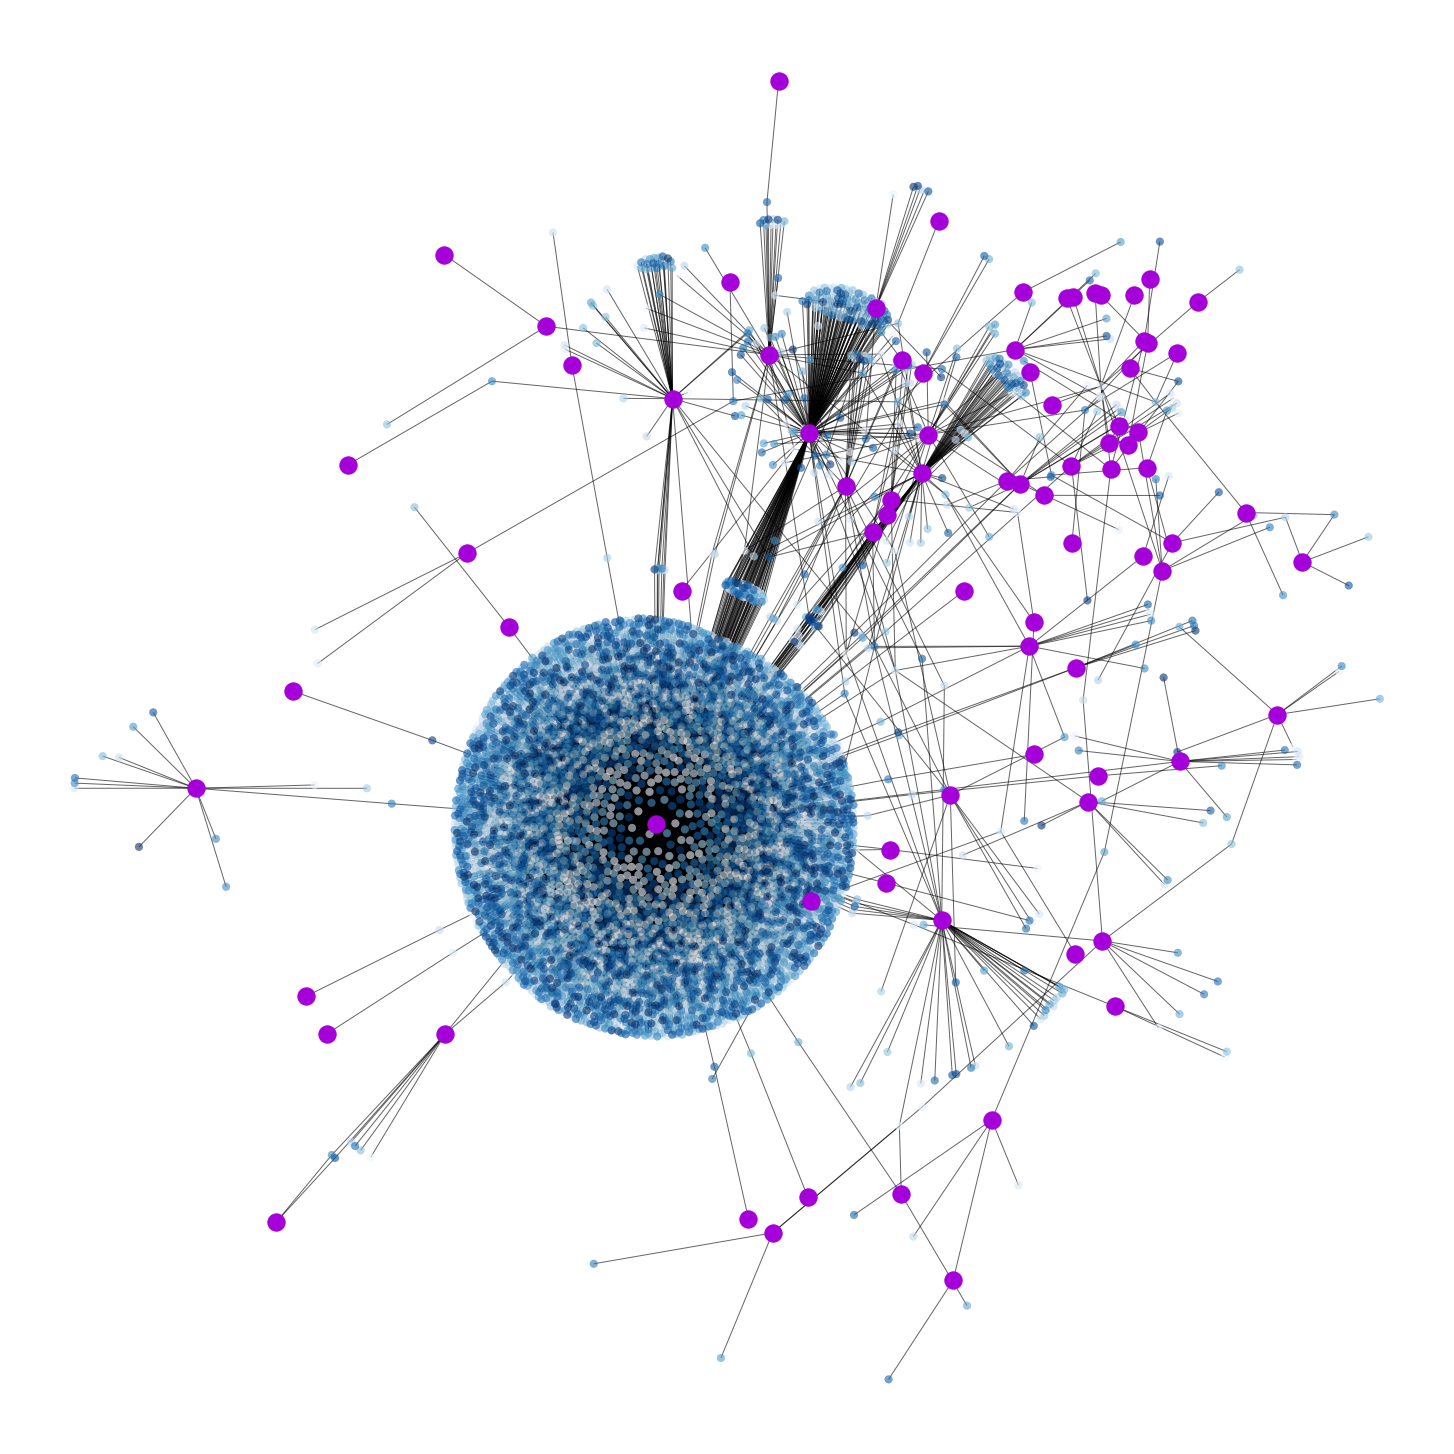

In [166]:
plt.figure(figsize = (20,20))
nx.draw(largest_subgraph, pos=pos, node_color=range(5827), cmap=plt.cm.Blues, edge_color="black", linewidths=0.3, node_size=60, alpha=0.6, with_labels=False)
nx.draw_networkx_nodes(largest_subgraph, pos=pos, nodelist=central, node_size=300,node_color='#a500d9')
#plt.savefig('graphfinal.png')
plt.show()